In [1]:
import matplotlib as plt

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('./GB.SEM.laptops-prices.csv', encoding='cp1251')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


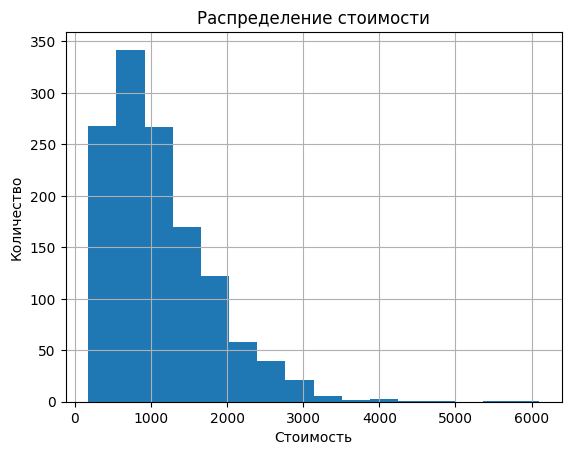

In [13]:
plt.figure
plt.hist(df['Price_euros'], bins =16)
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title('Распределение стоимости')
plt.grid();

Text(0.5, 1.0, 'Распределение стоимости')

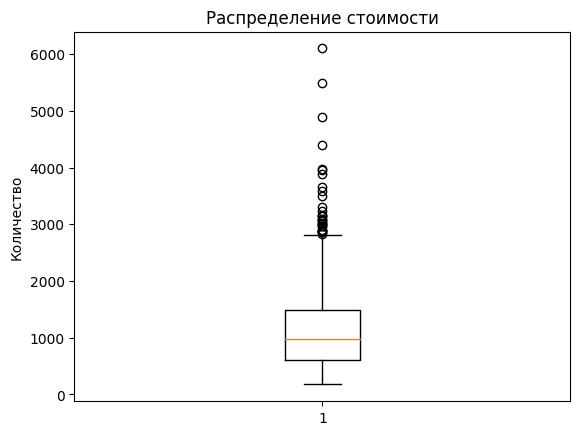

In [14]:
plt.figure
plt.boxplot(df['Price_euros'])
plt.ylabel('Количество')
plt.title('Распределение стоимости')


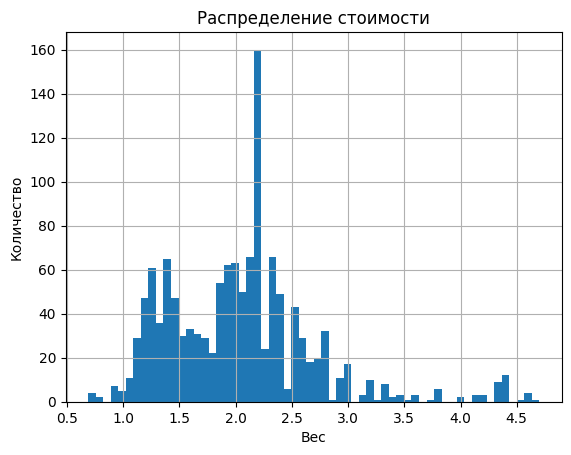

In [16]:
plt.figure
plt.hist(df['Weight'], bins = 60)
plt.xlabel('Вес')
plt.ylabel('Количество')
plt.title('Распределение стоимости')
plt.grid();

<Axes: xlabel='Weight', ylabel='Count'>

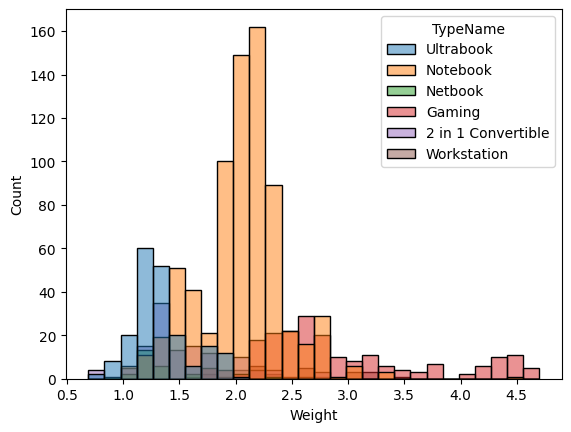

In [17]:
#Гистограмма с раскраской, соответствующей типу ноутбука
sns.histplot(data=df, x="Weight", hue="TypeName")

### №4.2. "laptops-prices"

2.1 Изучите распределение типов носителя

2.2 Изучите распределение компаний производителей

2.3 Изучите распределение операционной системы

2.4 Изучите распределение компаний производителей CPU
    - Постройте график
    - Сделайте выводы

In [20]:
# Извлекаем тип носителя
df['Memory_Type'].describe()

count     1303
unique       4
top        SSD
freq       641
Name: Memory_Type, dtype: object

In [23]:
data = df['Memory_Type'].value_counts()
data

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

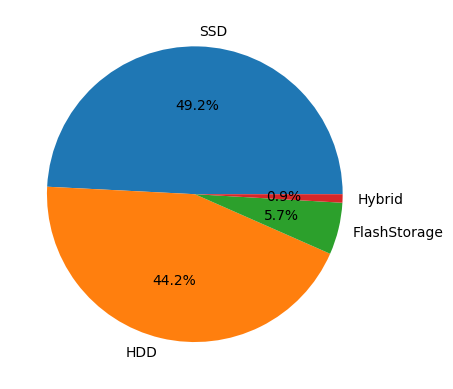

In [26]:
plt.figure
plt.pie(data.values, labels=data.index, autopct='%.1f%%');
plt.show()

In [28]:
data_company = df['Company'].value_counts()
data_company

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

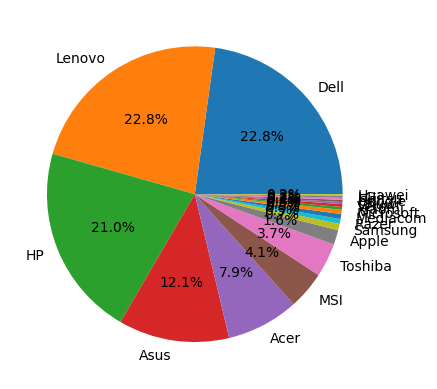

In [29]:
plt.figure
plt.pie(data_company.values, labels=data_company.index, autopct='%.1f%%');

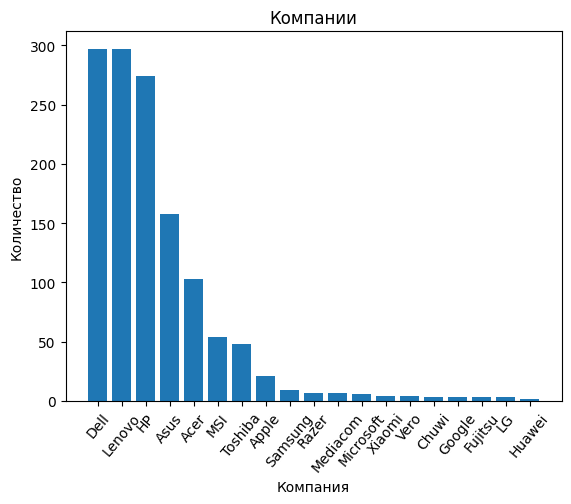

In [36]:
plt.figure
#plt.hist(df['Company'], bins = 60)
plt.bar(data_company.index, data_company.values)
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.title('Компании')
# plt.grid()
plt.xticks(rotation = 50);

In [37]:
data_OS = df['OpSys'].value_counts()
data_OS

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

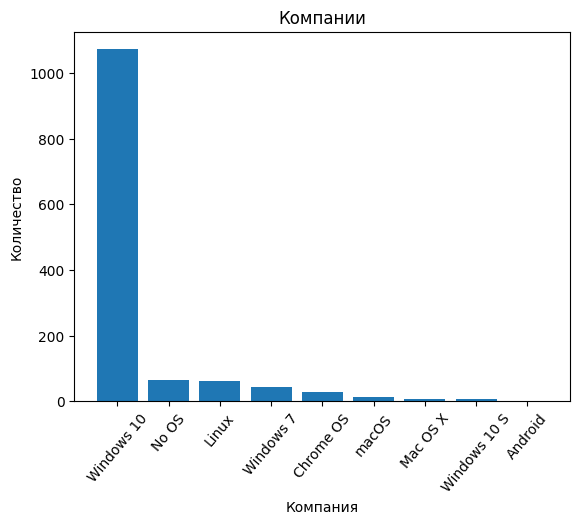

In [38]:
plt.figure
plt.bar(data_OS.index, data_OS.values)
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.title('Компании')
plt.xticks(rotation = 50);

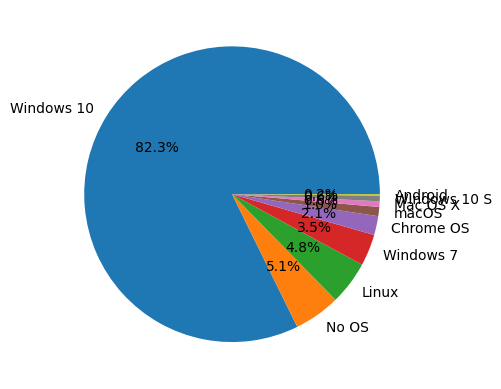

In [39]:
plt.figure
plt.pie(data_OS.values, labels=data_OS.index, autopct='%.1f%%');

In [51]:
# Извлекаем только один столбец
data = df[df['OpSys'] != 'Windows 10']['OpSys'].value_counts()
data

OpSys
No OS           66
Linux           62
Windows 7       45
Chrome OS       27
macOS           13
Mac OS X         8
Windows 10 S     8
Android          2
Name: count, dtype: int64

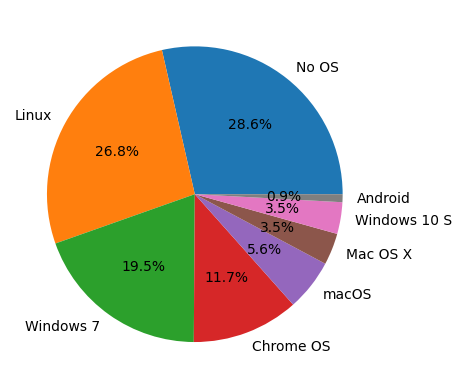

In [52]:
plt.figure()
plt.pie(data.values, labels=data.index, autopct='%.1f%%');

### №4.3. Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте
3.1 Постройте график в абсолютных величинах
3.2 Постройте график в относительных величинах

In [53]:
df.head(1)

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD


In [56]:
data = (pd.crosstab(df['Company'], df['Cpu_Company'])).drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


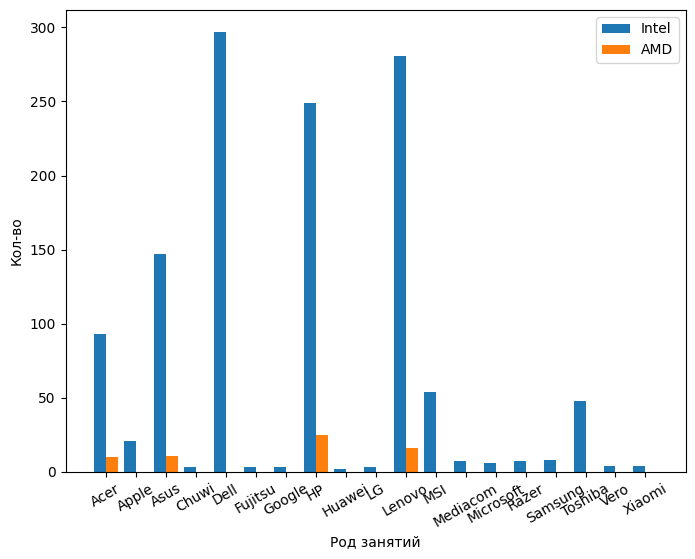

In [58]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Intel']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['Intel'], width=w)
plt.bar(n_ticks + offset, data['AMD'], width=w)

plt.title('')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data['Company'], rotation = 30);  # добавляем метки делений

In [60]:
d = df.corr(numeric_only=True)

<Axes: >

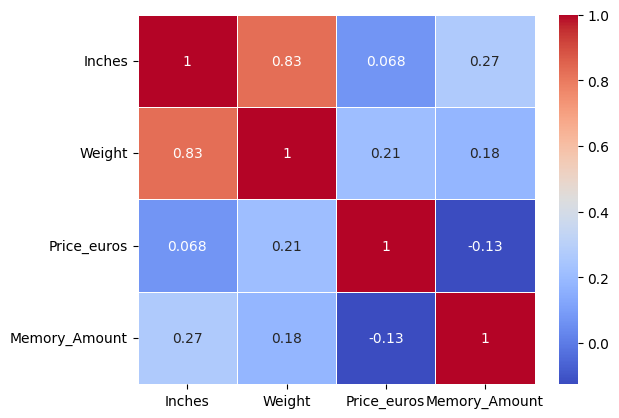

In [61]:
plt.figure()
sns.heatmap(d, annot = True, linewidths=0.5, cmap='coolwarm')